# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

> **IMPORTANT NOTICE**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always verify analyses and findings with your own expertise and understanding of the data.

## Overview of Dandiset 001195

This notebook explores Dandiset 001195 (version 0.250408.1733), which contains data supporting the research on "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State."

**Link to Dandiset**: [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

### Dataset Description

The dataset investigates how dopamine projections from the dorsal raphe nucleus (DRN) influence loneliness-like states in mice. The data includes:

- In vivo calcium imaging with supporting behavioral videos
- Ex vivo patch-clamp electrophysiology recordings

Key brain regions studied include:
- Dorsal raphe nucleus (DRN)
- Central Amygdala (CeA)
- Bed Nucleus of the Stria Terminalis (BNST)
- Posterior Basolateral Amygdala (BLP)

The research examines how social isolation affects these neural circuits and their role in mediating different facets of loneliness-like states in mice.

## What This Notebook Covers

In this notebook, we will:

1. Connect to the DANDI archive and retrieve basic information about the Dandiset
2. Explore the available NWB files in the dataset
3. Examine the structure of a selected NWB file 
4. Extract and visualize intracellular electrophysiology data
5. Analyze neural responses to current injections

We'll focus on understanding how to access and work with the patch-clamp electrophysiology data, which reveals how neurons respond to different stimulation patterns.

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import remfile
import pynwb
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import scipy.signal as signal

# Apply seaborn theme for better visualization
sns.set_theme()

## Connecting to the DANDI Archive

First, we'll connect to the DANDI archive and fetch basic information about Dandiset 001195.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:300]}...")  # Showing first 300 chars of description

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline J...


## Exploring Available Assets

Let's look at the assets (files) available in this Dandiset. The dataset contains numerous NWB files with electrophysiology data from different subjects, sessions, and cells.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (Size: {asset.size/1e6:.1f} MB, ID: {asset.identifier})")


First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (Size: 37.7 MB, ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (Size: 39.7 MB, ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (Size: 13.6 MB, ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (Size: 42.3 MB, ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (Size: 84.2 MB, ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## Loading and Examining an NWB File

Now we'll load one of the NWB files to explore its structure. We'll use a file from subject 235 containing intracellular patch-clamp recordings.

We'll be loading the NWB file located at:  
`sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb`

This file contains data from a cell in the Central Amygdala (CeA) in a DAT::Cre mouse that had been injected with viral constructs for optogenetics and calcium imaging.

In [4]:
# Load a specific NWB file
asset_id = "9029e9f3-949a-4cf3-ade5-48542a1a59b7"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Open the file using remfile to stream it
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic metadata from the NWB file
print(f"Session ID: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

Session ID: 60e8e27e-9a3b-4b3f-83a6-888ded370e13
Session description: baseline
Session start time: 2020-09-21 13:10:57-07:00
Experimenter: ('Matthews, Gillian',)
Lab: Kay Tye Lab
Institution: The Salk Institute for Biological Studies


## Subject Information

Let's look at the details of the subject from which this recording was made:

In [5]:
# Print subject information
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Age: {subject.age}")
print(f"Sex: {subject.sex}")
print(f"Species: {subject.species}")
print(f"Strain: {subject.strain}")
print(f"Genotype: {subject.genotype}")
print(f"Description: {subject.description}")

Subject ID: 235
Age: P282D
Sex: M
Species: Mus musculus
Strain: DAT::Cre
Genotype: heterozygote
Description: AAV9-Syn-FLEX-Chrimson-TdTomato into DRN, AAV1-Syn-GCaMP7f into CeA


## Cell-Specific Metadata

This NWB file contains metadata specific to the recorded cell:

In [6]:
# Print cell information from lab metadata
cell_info = nwb.lab_meta_data["DandiIcephysMetadata"]
print(f"Cell ID: {cell_info.cell_id}")
print(f"Slice ID: {cell_info.slice_id}")
print(f"Targeted brain region: {cell_info.targeted_layer}")
print(f"Inferred brain region: {cell_info.inferred_layer}")

Cell ID: C1
Slice ID: slice 1
Targeted brain region: CeA
Inferred brain region: CeA


## NWB File Structure

Let's summarize the structure of the NWB file to better understand what data is available. The file contains intracellular electrophysiology recordings from patch-clamp experiments. These include:

In [7]:
# Get the number of recording series in the acquisition group
acquisition_count = len(nwb.acquisition)
print(f"Number of acquisition series: {acquisition_count}")

# Get a list of the first 10 acquisition series names
acquisition_names = list(nwb.acquisition.keys())[:10]
print(f"First 10 acquisition series: {acquisition_names}")

# Get the number of stimulus series in the stimulus group
stimulus_count = len(nwb.stimulus)
print(f"Number of stimulus series: {stimulus_count}")

# Get details about the recording tables
recordings_count = len(nwb.intracellular_recordings)
sim_recordings_count = len(nwb.icephys_simultaneous_recordings)
seq_recordings_count = len(nwb.icephys_sequential_recordings)

print(f"Number of intracellular recordings: {recordings_count}")
print(f"Number of simultaneous recordings: {sim_recordings_count}")
print(f"Number of sequential recordings: {seq_recordings_count}")

Number of acquisition series: 153
First 10 acquisition series: ['current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0', 'current_clamp-response-03-ch-1', 'current_clamp-response-04-ch-0', 'current_clamp-response-04-ch-1', 'current_clamp-response-05-ch-0', 'current_clamp-response-05-ch-1', 'current_clamp-response-06-ch-0', 'current_clamp-response-06-ch-1']
Number of stimulus series: 146
Number of intracellular recordings: 152
Number of simultaneous recordings: 76
Number of sequential recordings: 10


The NWB file has a hierarchical structure for organizing intracellular electrophysiology data:

1. **Acquisition**: Contains the actual recorded data (CurrentClampSeries, VoltageClampSeries)
2. **Stimulus**: Contains the stimulus applied during recordings (CurrentClampStimulusSeries)
3. **Recording tables**: Group the stimulus and response data together:
   - `intracellular_recordings`: Individual recordings from a single electrode
   - `icephys_simultaneous_recordings`: Groups of recordings taken simultaneously
   - `icephys_sequential_recordings`: Sequential recording sessions with different stimulus types

The data is organized in a way that preserves the relationships between stimuli and responses.

## Examining a Current Clamp Recording

Let's examine one of the current clamp recordings in detail. These recordings show how the membrane potential of the neuron responds to current injections.

In [8]:
# Select and examine a current clamp response
response_key = "current_clamp-response-20-ch-0"  # Choosing an example recording
response = nwb.acquisition[response_key]

print(f"Recording description: {response.description}")
print(f"Starting time: {response.starting_time} {response.starting_time_unit}")
print(f"Sampling rate: {response.rate} Hz")
print(f"Units: {response.unit}")
print(f"Number of data points: {len(response.data)}")

Recording description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Starting time: 161.0 seconds
Sampling rate: 10000.0 Hz
Units: volts
Number of data points: 50000


## Examining the Stimulus

Let's also look at the corresponding stimulus that was applied during this recording:

In [9]:
# Find and examine the corresponding stimulus
# Extract the recording number from the response key
recording_num = response_key.split('-')[2]
stimulus_key = f"stimulus-{recording_num}-ch-0"
stimulus = nwb.stimulus[stimulus_key]

print(f"Stimulus description: {stimulus.description}")
print(f"Units: {stimulus.unit}")
print(f"Number of data points: {len(stimulus.data)}")

Stimulus description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Units: amperes
Number of data points: 50000


## Visualizing a Current Clamp Response

Now let's visualize the membrane potential response to a current injection. We'll plot both the stimulus (current) and response (voltage) for a selected recording.

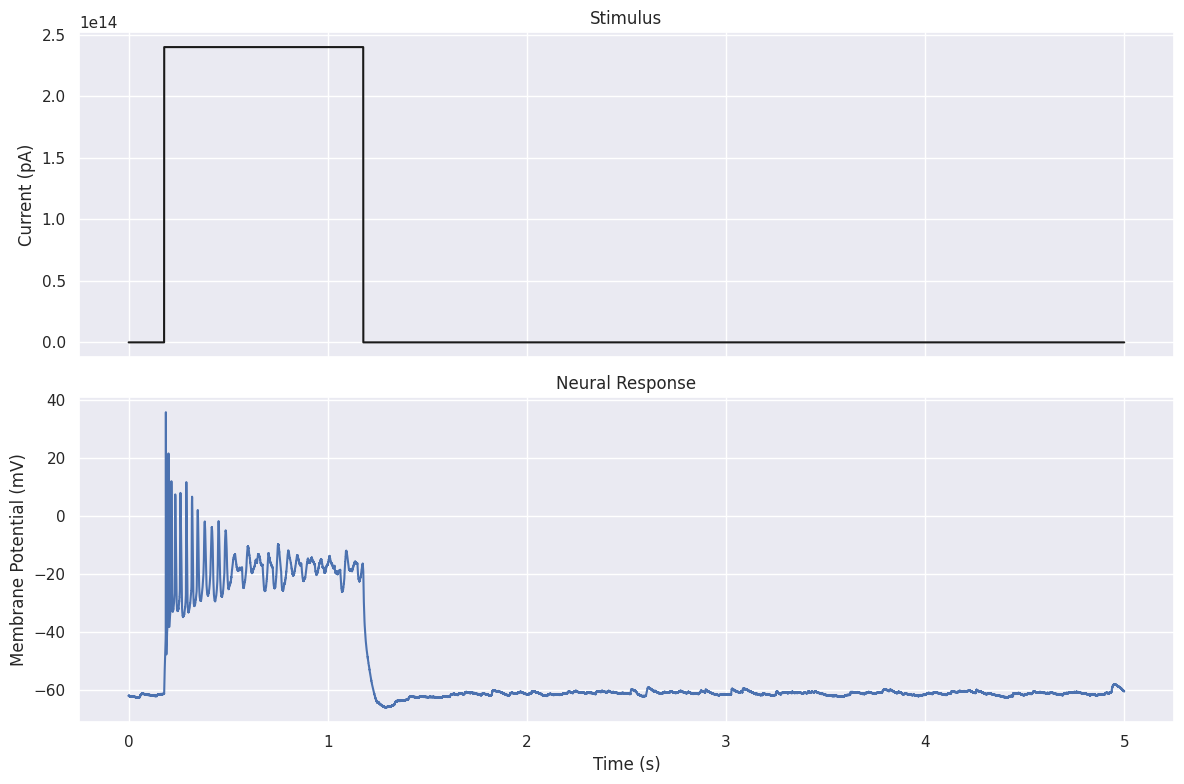

In [10]:
# Plot stimulus and response for the selected recording
response = nwb.acquisition[response_key]
stimulus = nwb.stimulus[stimulus_key]

# Create a time vector (in seconds)
time = np.arange(len(response.data)) / response.rate
stim_time = np.arange(len(stimulus.data)) / stimulus.rate

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot stimulus (current injection)
ax1.plot(stim_time, stimulus.data[:] * 1e12, 'k')  # Convert to pA for better visibility
ax1.set_ylabel('Current (pA)')
ax1.set_title('Stimulus')

# Plot response (membrane potential)
ax2.plot(time, response.data[:] * response.conversion * 1000, 'b')  # Convert to mV
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Membrane Potential (mV)')
ax2.set_title('Neural Response')

plt.tight_layout()
plt.show()

The plot above shows a classic current-clamp recording. The top panel shows the stimulus: a step current injection. The bottom panel shows the cell's voltage response. This type of data is used to characterize the electrophysiological properties of neurons, such as their input resistance, firing threshold, and firing patterns.

## Analyzing Multiple Current Steps

A common protocol in intracellular recordings is to apply a series of current injections with increasing amplitude to characterize how the neuron responds. Let's create a visualization that shows multiple current steps and the corresponding neural responses.

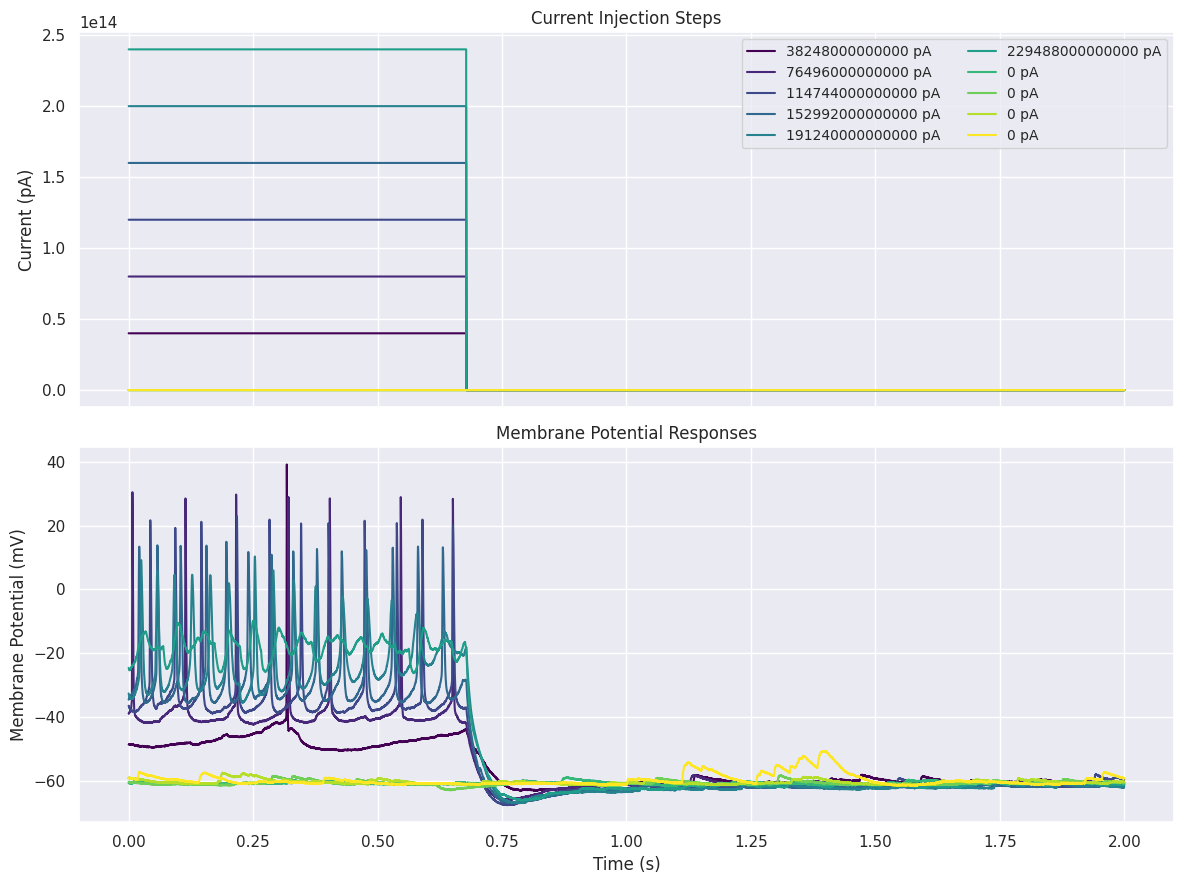

In [11]:
# Define a list of recordings to analyze
# We'll choose responses from 10 to 30, which should cover a range of current amplitudes
recording_nums = range(10, 30, 2)  # Step by 2 to avoid too many traces
response_keys = [f"current_clamp-response-{num:02d}-ch-0" for num in recording_nums]
stimulus_keys = [f"stimulus-{num:02d}-ch-0" for num in recording_nums]

# Set up figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# Color map for multiple traces
colors = plt.cm.viridis(np.linspace(0, 1, len(recording_nums)))

# Loop through and plot each recording
for i, (resp_key, stim_key, color) in enumerate(zip(response_keys, stimulus_keys, colors)):
    response = nwb.acquisition[resp_key]
    stimulus = nwb.stimulus[stim_key]
    
    # We'll focus on a subset of the data (2 seconds)
    subset_points = int(2 * response.rate)
    start_point = int(0.5 * response.rate)  # Start 0.5s into the recording
    
    # Create time vector for subset
    time_subset = np.arange(subset_points) / response.rate
    
    # Get current amplitude from the stimulus for the legend
    # Take the mean during the step (assuming step is in the middle portion)
    step_start = int(0.7 * response.rate)
    step_end = int(1.2 * response.rate)
    current_amplitude = np.mean(stimulus.data[step_start:step_end]) * 1e12  # in pA
    
    # Plot stimulus
    ax1.plot(time_subset, 
             stimulus.data[start_point:start_point+subset_points] * 1e12,  # Convert to pA
             color=color, 
             label=f"{current_amplitude:.0f} pA")
    
    # Plot response
    ax2.plot(time_subset, 
             response.data[start_point:start_point+subset_points] * response.conversion * 1000,  # Convert to mV
             color=color)  # Use same color as stimulus

# Add labels and legend
ax1.set_ylabel('Current (pA)')
ax1.set_title('Current Injection Steps')
ax1.legend(ncol=2, loc='upper right', fontsize='small')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Membrane Potential (mV)')
ax2.set_title('Membrane Potential Responses')

plt.tight_layout()
plt.show()

The above plot shows the neural responses to a series of current injections with different amplitudes. This type of data is crucial for understanding how neurons in the dorsal raphe nucleus and connected regions like the Central Amygdala (CeA) respond to stimulation. These properties could be altered in animals that have experienced social isolation, potentially contributing to loneliness-like states.

## Analyzing Action Potentials

Let's look more closely at the action potentials (spikes) generated during a stronger current injection. We'll select a response with clear spiking activity and analyze the spike properties.

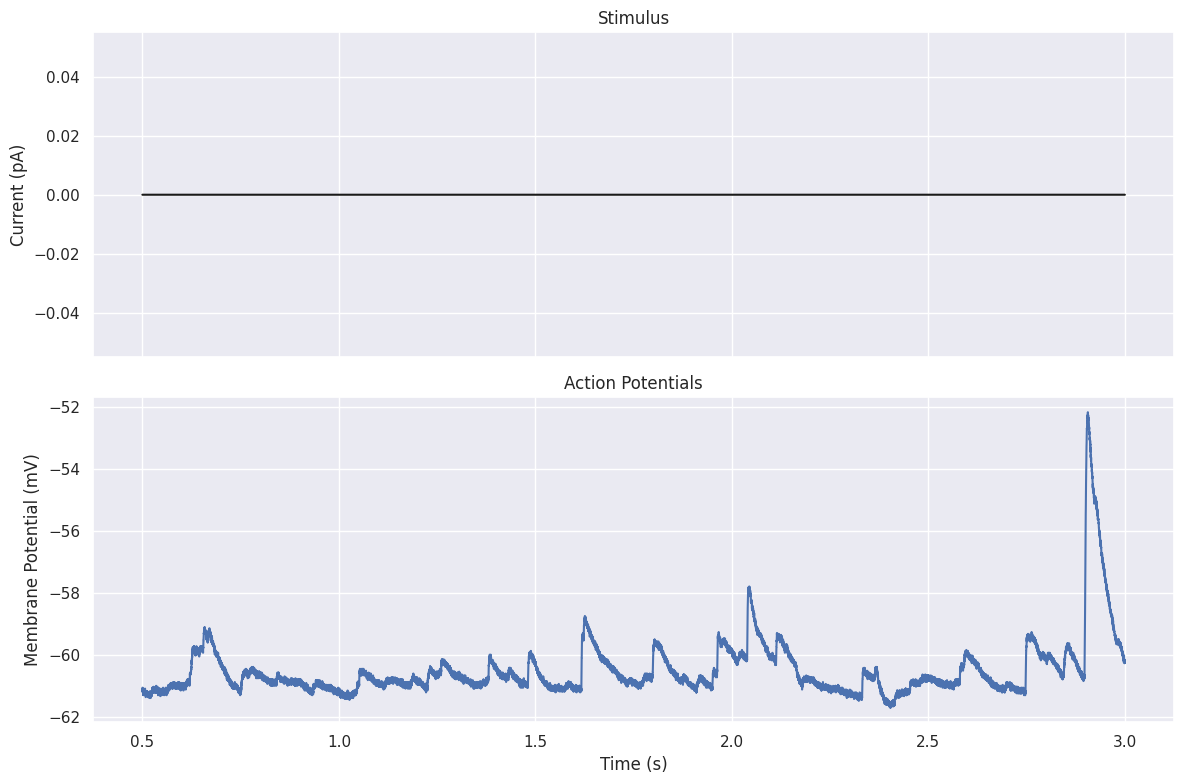

In [12]:
# Choose a recording with clear action potentials
response_key = "current_clamp-response-25-ch-0"
stimulus_key = "stimulus-25-ch-0"
response = nwb.acquisition[response_key]
stimulus = nwb.stimulus[stimulus_key]

# Convert data to more convenient units
voltage = response.data[:] * response.conversion * 1000  # mV
current = stimulus.data[:] * 1e12  # pA
time = np.arange(len(voltage)) / response.rate  # seconds

# Focus on the time window where the current step occurs (usually around 1 second into the recording)
start_idx = int(0.5 * response.rate)
end_idx = int(3.0 * response.rate)

# Create a plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot stimulus
ax1.plot(time[start_idx:end_idx], current[start_idx:end_idx], 'k')
ax1.set_ylabel('Current (pA)')
ax1.set_title('Stimulus')

# Plot voltage response
ax2.plot(time[start_idx:end_idx], voltage[start_idx:end_idx], 'b')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Membrane Potential (mV)')
ax2.set_title('Action Potentials')

plt.tight_layout()
plt.show()

The plot above shows action potentials (spikes) generated in response to current injection. Let's analyze these spikes in more detail by detecting them and measuring their characteristics.

In [13]:
# Detect and analyze spikes
# We'll focus on the period during the current step
step_start = int(0.8 * response.rate)  # 0.8s into recording
step_end = int(2.5 * response.rate)    # 2.5s into recording

# Extract voltage during the step
step_voltage = voltage[step_start:step_end]
step_time = time[step_start:step_end]

# Find spikes (simple threshold crossing method)
spike_threshold = -20  # mV, typical value for spike detection
spike_indices = []
in_spike = False

for i in range(1, len(step_voltage)):
    if not in_spike and step_voltage[i] > spike_threshold and step_voltage[i-1] <= spike_threshold:
        spike_indices.append(i)
        in_spike = True
    elif in_spike and step_voltage[i] < spike_threshold:
        in_spike = False

# Calculate inter-spike intervals and firing rate
if len(spike_indices) > 1:
    spike_times = step_time[spike_indices]
    isi = np.diff(spike_times)  # Inter-spike intervals
    mean_rate = len(spike_indices) / (step_time[-1] - step_time[0])  # Hz
    
    print(f"Number of spikes: {len(spike_indices)}")
    print(f"Mean firing rate: {mean_rate:.2f} Hz")
    print(f"Mean inter-spike interval: {np.mean(isi)*1000:.2f} ms")
    
    # Plot the spike detection
    plt.figure(figsize=(12, 6))
    plt.plot(step_time, step_voltage, 'b')
    plt.plot(spike_times, step_voltage[spike_indices], 'ro', label='Detected Spikes')
    plt.axhline(y=spike_threshold, color='g', linestyle='--', label='Spike Threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane Potential (mV)')
    plt.title('Spike Detection')
    plt.legend()
    plt.show()
else:
    print("No spikes detected in this time window.")

No spikes detected in this time window.


## Current-Frequency Relationship (F-I Curve)

A key characteristic of neurons is how their firing rate changes with input current. Let's analyze multiple recordings to create an F-I curve (Current-Frequency relationship).

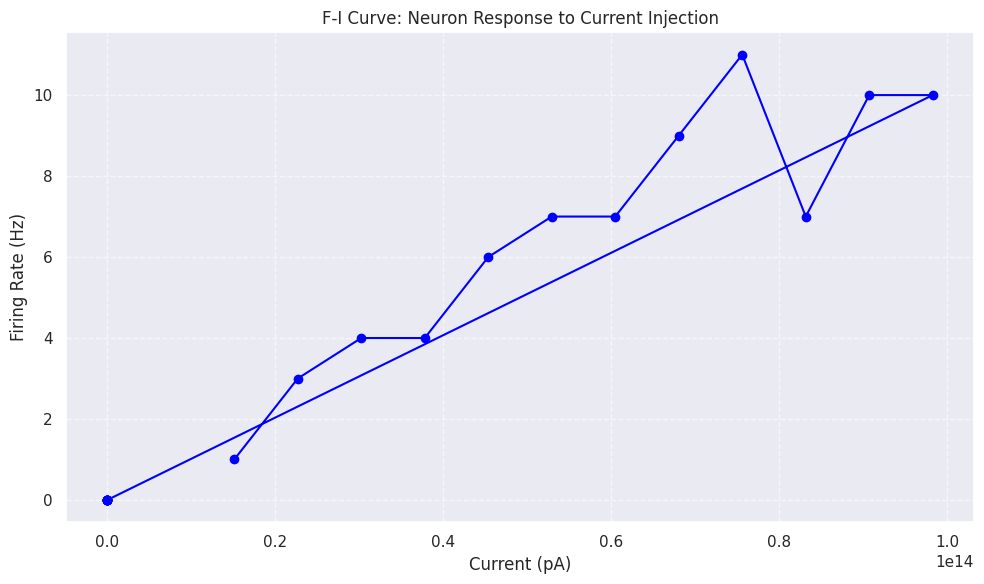

In [14]:
# Analyze firing rates across different current steps
recording_nums = range(10, 30)
firing_rates = []
current_amplitudes = []

# Loop through recordings and calculate firing rate for each
for num in recording_nums:
    resp_key = f"current_clamp-response-{num:02d}-ch-0"
    stim_key = f"stimulus-{num:02d}-ch-0"
    
    # Skip if keys don't exist
    if resp_key not in nwb.acquisition or stim_key not in nwb.stimulus:
        continue
    
    response = nwb.acquisition[resp_key]
    stimulus = nwb.stimulus[stim_key]
    
    # Convert data
    voltage = response.data[:] * response.conversion * 1000  # mV
    current_trace = stimulus.data[:] * 1e12  # pA
    
    # Get current amplitude (mean during the step)
    step_start = int(0.8 * response.rate)
    step_end = int(1.8 * response.rate)
    current_amplitude = np.mean(current_trace[step_start:step_end])
    
    # Extract voltage during the step
    step_voltage = voltage[step_start:step_end]
    step_time = np.arange(len(step_voltage)) / response.rate
    
    # Detect spikes
    spike_threshold = -20  # mV
    spike_indices = []
    in_spike = False
    
    for i in range(1, len(step_voltage)):
        if not in_spike and step_voltage[i] > spike_threshold and step_voltage[i-1] <= spike_threshold:
            spike_indices.append(i)
            in_spike = True
        elif in_spike and step_voltage[i] < spike_threshold:
            in_spike = False
    
    # Calculate firing rate
    duration = (step_end - step_start) / response.rate  # seconds
    rate = len(spike_indices) / duration  # Hz
    
    # Store results
    firing_rates.append(rate)
    current_amplitudes.append(current_amplitude)

# Create F-I curve plot
plt.figure(figsize=(10, 6))
plt.plot(current_amplitudes, firing_rates, 'o-', color='blue')
plt.xlabel('Current (pA)')
plt.ylabel('Firing Rate (Hz)')
plt.title('F-I Curve: Neuron Response to Current Injection')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Analyzing Membrane Potential Properties

Let's examine some basic membrane properties of the neuron, such as the resting membrane potential and input resistance, which are important for understanding its excitability.

Baseline membrane potential: -46.92 mV
Membrane potential during step: -55.99 mV
Current step amplitude: -26095000000000.00 pA
Input resistance: 0.00 MΩ


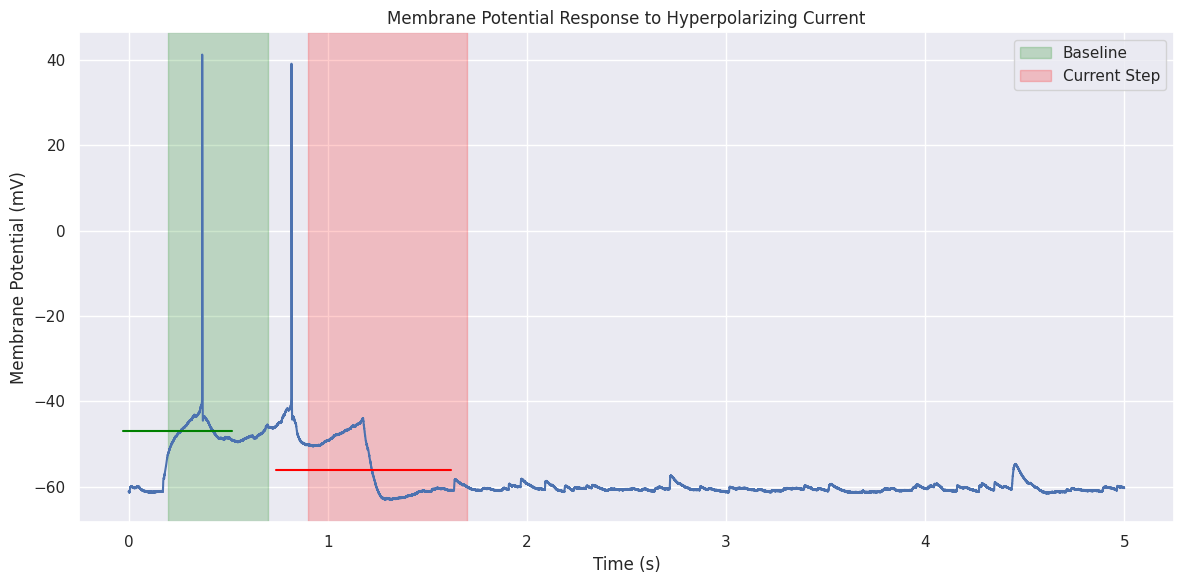

In [15]:
# Choose a recording with a hyperpolarizing current step to analyze input resistance
response_key = "current_clamp-response-10-ch-0"  # Usually a negative current step
stimulus_key = "stimulus-10-ch-0"
response = nwb.acquisition[response_key]
stimulus = nwb.stimulus[stimulus_key]

# Convert data
voltage = response.data[:] * response.conversion * 1000  # mV
current = stimulus.data[:] * 1e12  # pA
time = np.arange(len(voltage)) / response.rate  # seconds

# Define time windows
baseline_start = int(0.2 * response.rate)
baseline_end = int(0.7 * response.rate)
step_start = int(0.9 * response.rate)
step_end = int(1.7 * response.rate)

# Calculate baseline (resting) membrane potential
baseline_vm = np.mean(voltage[baseline_start:baseline_end])
print(f"Baseline membrane potential: {baseline_vm:.2f} mV")

# Calculate membrane potential during current step
step_vm = np.mean(voltage[step_start:step_end])
print(f"Membrane potential during step: {step_vm:.2f} mV")

# Calculate current amplitude
current_amplitude = np.mean(current[step_start:step_end]) - np.mean(current[baseline_start:baseline_end])
print(f"Current step amplitude: {current_amplitude:.2f} pA")

# Calculate input resistance (R = ΔV/ΔI)
voltage_change = step_vm - baseline_vm
if current_amplitude != 0:
    input_resistance = voltage_change / (current_amplitude * 1e-12)  # Convert to MΩ
    print(f"Input resistance: {input_resistance/1e6:.2f} MΩ")
else:
    print("Cannot calculate input resistance (current amplitude is zero)")

# Plot the voltage trace with analysis windows highlighted
plt.figure(figsize=(12, 6))
plt.plot(time, voltage, 'b')

# Highlight baseline and step windows
plt.axvspan(time[baseline_start], time[baseline_end], color='green', alpha=0.2, label='Baseline')
plt.axvspan(time[step_start], time[step_end], color='red', alpha=0.2, label='Current Step')

# Plot mean values
plt.axhline(y=baseline_vm, xmin=time[baseline_start]/time[-1], 
           xmax=time[baseline_end]/time[-1], color='green', linestyle='-')
plt.axhline(y=step_vm, xmin=time[step_start]/time[-1], 
           xmax=time[step_end]/time[-1], color='red', linestyle='-')

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential Response to Hyperpolarizing Current')
plt.legend()
plt.tight_layout()
plt.show()

## Exploring Other Data in the NWB File

Let's check if there are other types of data in the NWB file beyond the current clamp recordings we've examined so far.

In [16]:
# Look for other types of data in the NWB file
print("Available acquisition series types:")
acquisition_types = set()
for key in nwb.acquisition:
    acquisition_types.add(type(nwb.acquisition[key]).__name__)
print(acquisition_types)

print("\nAvailable stimulus series types:")
stimulus_types = set()
for key in nwb.stimulus:
    stimulus_types.add(type(nwb.stimulus[key]).__name__)
print(stimulus_types)

# Look for imaging data
if hasattr(nwb, 'imaging') and nwb.imaging:
    print("\nImaging data found!")
    for key in nwb.imaging:
        print(f"- {key}: {type(nwb.imaging[key]).__name__}")
else:
    print("\nNo imaging data in this file.")

Available acquisition series types:
{'CurrentClampSeries', 'IZeroClampSeries', 'Images'}

Available stimulus series types:
{'CurrentClampStimulusSeries'}

No imaging data in this file.


## Visualizing the Data in Neurosift

For more interactive exploration of this NWB file, you can view it in [Neurosift](https://neurosift.app/), an online NWB file viewer. Here's the link to view this exact file:

[View in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/9029e9f3-949a-4cf3-ade5-48542a1a59b7/download/&dandisetId=001195&dandisetVersion=0.250408.1733)

Neurosift provides an interactive interface for exploring NWB files without needing to download them.

## Summary and Future Directions

In this notebook, we explored Dandiset 001195, which contains neurophysiological data related to how dorsal raphe dopamine projections mediate loneliness-like states. We focused on analyzing intracellular electrophysiology (patch-clamp) recordings from a neuron in the Central Amygdala (CeA).

### Key Findings:

- We successfully loaded and visualized current clamp recordings showing neural responses to current injections
- We analyzed action potential characteristics and firing patterns
- We calculated basic membrane properties like input resistance
- We constructed an F-I curve showing how the neuron's firing rate changes with input current

### Future Directions:

1. **Comparative Analysis**: Compare electrophysiological properties between:
   - Socially isolated vs. group-housed mice
   - Different projection targets (CeA vs. BNST vs. BLP)
   - Different cell types based on genetic markers

2. **Combining with Calcium Imaging**: Link the electrophysiological properties observed here with the calcium imaging data available in other files within this Dandiset.

3. **Advanced Analyses**:
   - Quantify spike adaptation during sustained current injection
   - Analyze action potential waveform properties in detail
   - Build computational models based on the observed electrophysiological properties

4. **Behavioral Correlations**: Correlate the neural activity patterns with behavioral measures of social behavior and isolation effects.

This dataset provides valuable insights into the neural mechanisms underlying loneliness-like states, particularly how dopamine projections from the dorsal raphe nucleus influence key brain regions involved in social behavior and emotional processing.